In [2]:
import pandas as pd
import numpy as np
import datetime as datetime

# Data Cleaning and Preprocessing

In [3]:
sm=pd.read_csv("social_media.csv")

In [4]:
sm.head()

,User ID,Username,Platform,Post ID,Post Text,Post Timestamp,Likes/Reactions,Comments,Shares/Retweets,Hashtags,...,Account Creation Date,Account Verification,User Engagement,User Interactions,User Activity,User Bio,User Description 1,User Description 2,Server Post,User Language
0,101,@adventureSeeker,Instagram,82036,"""Experiencing the thrill of a lifetime! #Adven...",30-07-2023 14:45,1500,250,120,#AdventureTime,...,10-05-2019,Verified,1870,15700,3 posts per week,Adventure enthusiast,Nature lover,Seeker of wanderlust ??,"California, USA",English
1,215,@foodieTraveler,Twitter,12463,"""Indulging in local delicacies! #FoodieTravels""",30-07-2023 19:30,850,70,50,#FoodieTravels,...,15-09-2017,Not verified,970,8300,5 posts per week,Culinary explorer,Street food connoisseur,Travel addict ??,"London, UK",English
2,303,@wellnessJourney,Facebook,45982,"""Finding peace and balance in nature!",30-07-2023 08:15,680,80,40,#WellnessJourney,...,02-03-2020,Not verified,800,6200,2 posts per week,Wellness enthusiast,Yogi in training,Mindfulness advocate,"San Francisco, USA",English
3,404,@fitnessFreak,Instagram,16572,"""Pushing my limits in the gym!",30-07-2023 12:30,1850,350,180,#FitnessGoals,...,12-08-2016,Verified,2380,32750,4 posts per week,Fitness enthusiast,Health is wealth,Workout addict,"Los Angeles, USA",English
4,521,@foodExplorer,Twitter,75589,"""Discovering unique flavors around the world!",30-07-2023 16:20,950,80,60,#Foodies,...,28-02-2018,Not verified,1090,9080,3 posts per week,Culinary adventurer,Gastronomic traveler,Bon app?it!,"Paris, France",English


In [5]:
sm.tail()

,User ID,Username,Platform,Post ID,Post Text,Post Timestamp,Likes/Reactions,Comments,Shares/Retweets,Hashtags,...,Account Creation Date,Account Verification,User Engagement,User Interactions,User Activity,User Bio,User Description 1,User Description 2,Server Post,User Language
34,817,@fashionGuru,YouTube,23879,"""Unlocking the secrets of style!",30-07-2023 12:10,520,70,40,#FashionInsider,...,25-07-2021,Not verified,630,5540,3 posts per week,Fashionista,Trend spotter,Runway observer,"Paris, France",English
35,940,@bookNerd,Goodreads,82714,"""Getting lost in the magic of books!",30-07-2023 16:25,370,50,30,#BookObsession,...,12-08-2020,Not verified,450,5120,2 posts per week,Bookworm,Literary enthusiast,Words are my refuge,"New York City, USA",English
36,108,@fitnessFreak,Twitter,95128,"""Pushing boundaries for a fitter tomorrow!",30-07-2023 20:00,760,110,70,#FitnessJunkie,...,18-09-2020,Not verified,940,8020,1 post per day,Fitness fanatic,Workout warrior,Health is wealth,"Los Angeles, USA",English
37,201,@foodieJourney,Instagram,80347,"""Embarking on a culinary journey!",30-07-2023 18:25,590,80,50,#FoodExplorer,...,28-01-2019,Not verified,720,6230,3 posts per week,Foodie at heart,Tasting cultures,Culinary storyteller,"Barcelona, Spain",English
38,305,@techGeek,Facebook,20983,"""Unraveling the marvels of technology!",30-07-2023 12:50,670,110,50,#TechEnthusiast,...,11-01-2016,Verified,830,20200,4 posts per week,Tech geek,Coding wizard,Futurist,"Silicon Valley, USA",English


In [7]:
print(sm.drop_duplicates(inplace=True))

None


# Cleaned Dataset

In [12]:
essential_columns = ['User ID', 'Username', 'Platform', 'Post ID', 'Post Text', 'Post Timestamp']
sm.dropna(subset=essential_columns, inplace=True)

sm['Post Timestamp'] = pd.to_datetime(sm['Post Timestamp'], errors='coerce')
sm['Account Creation Date'] = pd.to_datetime(sm['Account Creation Date'], errors='coerce')

print("\nCleaned Dataset Structure:")
print(sm.head())


Cleaned Dataset Structure:
   User ID          Username   Platform  Post ID  \
0      101  @adventureSeeker  Instagram    82036   
1      215   @foodieTraveler    Twitter    12463   
2      303  @wellnessJourney   Facebook    45982   
3      404     @fitnessFreak  Instagram    16572   
4      521     @foodExplorer    Twitter    75589   

                                           Post Text      Post Timestamp  \
0  "Experiencing the thrill of a lifetime! #Adven... 2023-07-30 14:45:00   
1    "Indulging in local delicacies! #FoodieTravels" 2023-07-30 19:30:00   
2              "Finding peace and balance in nature! 2023-07-30 08:15:00   
3                     "Pushing my limits in the gym! 2023-07-30 12:30:00   
4      "Discovering unique flavors around the world! 2023-07-30 16:20:00   

   Likes/Reactions  Comments  Shares/Retweets          Hashtags  ...  \
0             1500       250              120    #AdventureTime  ...   
1              850        70               50    #FoodieTr

# Analysis and Influence Scoring

In [13]:
influence_metrics = ['Likes/Reactions', 'Comments', 'Shares/Retweets']

# Calculate User Engagement
sm['User Engagement'] = sm[influence_metrics].sum(axis=1)

# Example: Calculate Influence Score
# You can customize the weights based on the importance of each metric
weights = {'Likes/Reactions': 1, 'Comments': 2, 'Shares/Retweets': 3}
sm['Influence Score'] = sm[influence_metrics].dot(pd.Series(weights))

# Display the dataset with influence scores
print("\nDataset with Influence Scores:")
print(sm.head())

# Identify influential users
influential_users = sm.sort_values(by='Influence Score', ascending=False)['Username'].head(10)
print("\nTop 10 Influential Users:")
print(influential_users)


Dataset with Influence Scores:
   User ID          Username   Platform  Post ID  \
0      101  @adventureSeeker  Instagram    82036   
1      215   @foodieTraveler    Twitter    12463   
2      303  @wellnessJourney   Facebook    45982   
3      404     @fitnessFreak  Instagram    16572   
4      521     @foodExplorer    Twitter    75589   

                                           Post Text      Post Timestamp  \
0  "Experiencing the thrill of a lifetime! #Adven... 2023-07-30 14:45:00   
1    "Indulging in local delicacies! #FoodieTravels" 2023-07-30 19:30:00   
2              "Finding peace and balance in nature! 2023-07-30 08:15:00   
3                     "Pushing my limits in the gym! 2023-07-30 12:30:00   
4      "Discovering unique flavors around the world! 2023-07-30 16:20:00   

   Likes/Reactions  Comments  Shares/Retweets          Hashtags  ...  \
0             1500       250              120    #AdventureTime  ...   
1              850        70               50    #Food

In [17]:
from nltk.tokenize import word_tokenize
from collections import Counter
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [18]:
sm['Hashtags'] = sm['Post Text'].apply(lambda x: [word.lower() for word in word_tokenize(x) if word.startswith('#')])

# Flatten the list of hashtags
all_hashtags = [tag for tags in sm['Hashtags'] for tag in tags]

# Count the occurrence of each hashtag
hashtag_counts = Counter(all_hashtags)

# Display the top N trending hashtags
top_trending_hashtags = hashtag_counts.most_common(10)
print("\nTop 10 Trending Hashtags:")
for hashtag, count in top_trending_hashtags:
    print(f"{hashtag}: {count}")


Top 10 Trending Hashtags:
#: 3


# Audience Analysis

In [22]:
unique_users = sm['Username'].unique()

audience_analysis = pd.DataFrame(columns=['Username', 'User Engagement', 'User Activity', 'User Bio'])

for user in unique_users:
    user_data = sm[sm['Username'] == user]
    
    user_engagement = user_data['Likes/Reactions'].sum()
    
    user_activity = len(user_data)
    
    user_bio = user_data.iloc[0]['User Bio']
    
    audience_analysis = audience_analysis.append({
        'Username': user,
        'User Engagement': user_engagement,
        'User Activity': user_activity,
        'User Bio': user_bio
    }, ignore_index=True)

print("\nAudience Analysis Results:")
print(audience_analysis.head())



Audience Analysis Results:
           Username User Engagement User Activity              User Bio
0  @adventureSeeker            1500             1  Adventure enthusiast
1   @foodieTraveler             850             1     Culinary explorer
2  @wellnessJourney             680             1   Wellness enthusiast
3     @fitnessFreak            2610             2    Fitness enthusiast
4     @foodExplorer            1710             2   Culinary adventurer


In [23]:
# Influence Socre Visualization

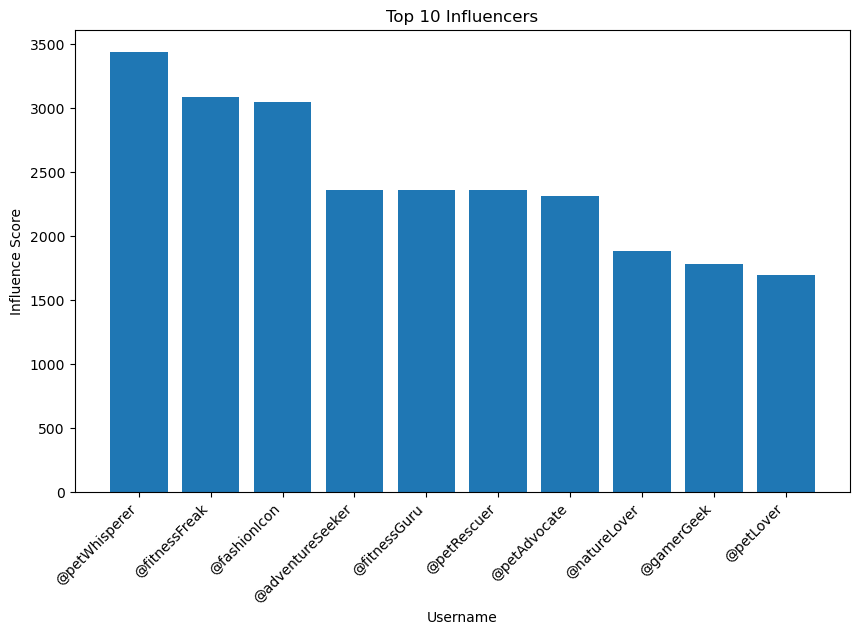

In [24]:
import matplotlib.pyplot as plt

# Bar plot of top influencers
top_influencers = sm.sort_values(by='Influence Score', ascending=False).head(10)
plt.figure(figsize=(10, 6))
plt.bar(top_influencers['Username'], top_influencers['Influence Score'])
plt.title('Top 10 Influencers')
plt.xlabel('Username')
plt.ylabel('Influence Score')
plt.xticks(rotation=45, ha='right')
plt.show()

# Trending Hashtags Visualization

In [26]:
!pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/d0/67/ebbc7e0c6da1753d7c30c2ca47c6bd11dbf2259cfa9c98151f4ab3d8b950/wordcloud-1.9.3-cp39-cp39-win_amd64.whl.metadata
   -------------------------------------- 300.6/300.6 kB 640.9 kB/s eta 0:00:00



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


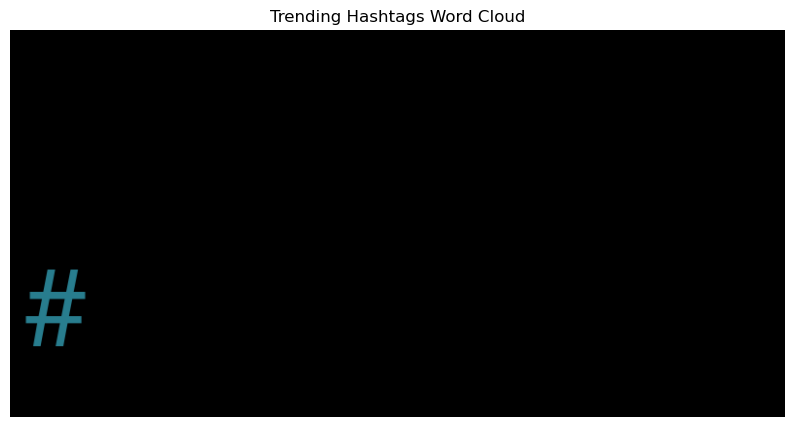

C:\Users\Administrator\AppData\Local\Temp\ipykernel_5324\1986146043.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[count for _, count in top_trending_hashtags], y=[hashtag for hashtag, _ in top_trending_hashtags], palette='viridis')


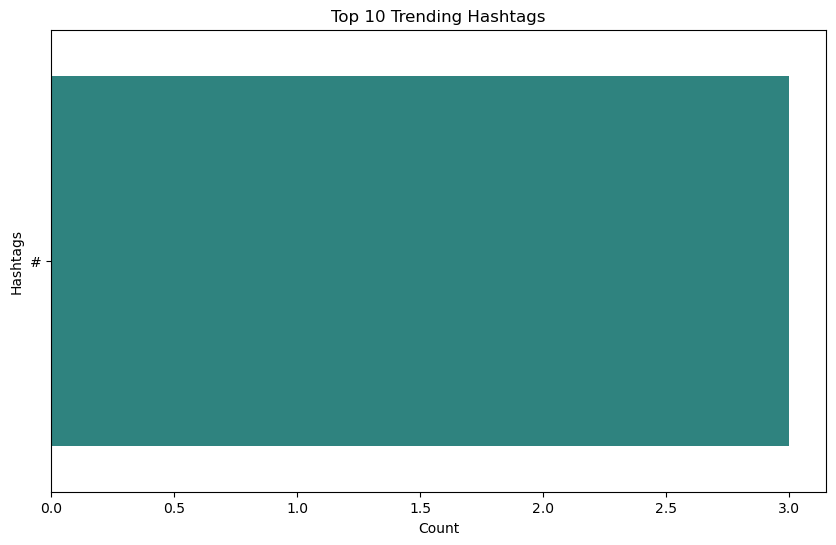

In [30]:
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate_from_frequencies(hashtag_counts)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Trending Hashtags Word Cloud')
plt.show()

# Bar plot for top trending hashtags
plt.figure(figsize=(10, 6))
sns.barplot(x=[count for _, count in top_trending_hashtags], y=[hashtag for hashtag, _ in top_trending_hashtags], palette='viridis')
plt.title('Top 10 Trending Hashtags')
plt.xlabel('Count')
plt.ylabel('Hashtags')
plt.show()

# Audience Analysis Visualization

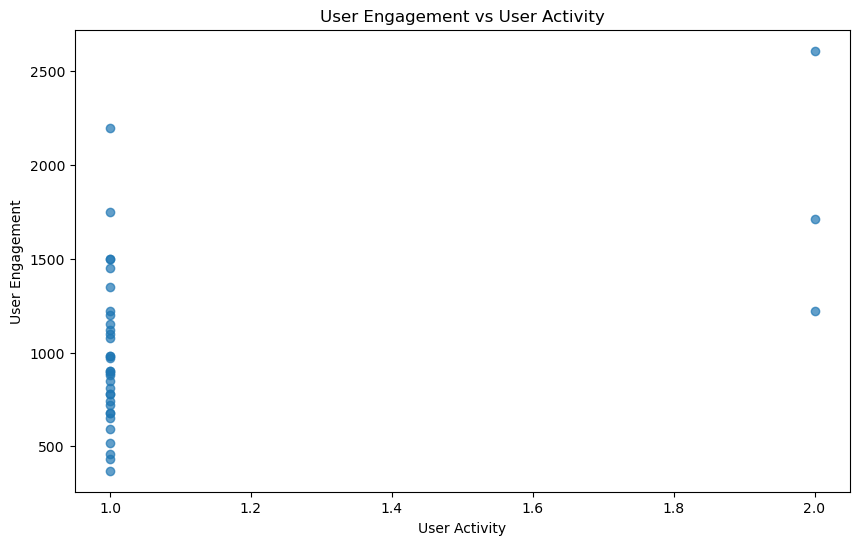

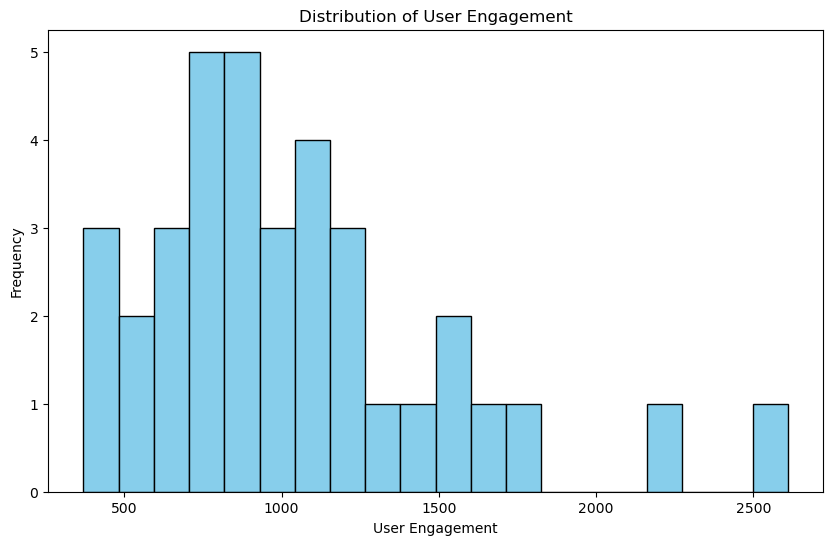

In [31]:
# Scatter plot for User Engagement vs User Activity
plt.figure(figsize=(10, 6))
plt.scatter(audience_analysis['User Activity'], audience_analysis['User Engagement'], alpha=0.7)
plt.title('User Engagement vs User Activity')
plt.xlabel('User Activity')
plt.ylabel('User Engagement')
plt.show()

# Histogram for User Engagement distribution
plt.figure(figsize=(10, 6))
plt.hist(audience_analysis['User Engagement'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of User Engagement')
plt.xlabel('User Engagement')
plt.ylabel('Frequency')
plt.show()
